# Analyzing Patterns and Trends in the UFC

![Daniel Cormier vs Jon Jones](https://sportshub.cbsistatic.com/i/r/2016/06/22/581136a1-eda8-40bf-8bdc-57efce664316/resize/750x422/684274c7571763a29508e6e4e5ae8eb3/jones-cormier.jpg "Daniel Cormier (right) fighting Jon Jones (left)")


# Introduction

##### The purpose of this project is to analyze UFC fight data from 2010 to 2024 to explore statistical patterns that occur in UFC fights, gain insight into how the UFC books their matches, and identify potential trends that can reveal more about what contributes to winning.

#### Questions we will be exploring:
- In terms of attributes other than weight, how do opposing fighters typically compare to each other?
- What are the most common types of fights?
- What are the most common ways a fight can finish?
- How likely will a champion successfully defend their title?
- Does more aggressive wrestling/ground game really improve striking? If so, how much?

## 1. Import

In [869]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


In [870]:
all_fights = pd.read_csv('ufc-master.csv')
all_fights

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Date,Location,Country,Winner,...,FinishDetails,FinishRound,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
0,Alexandre Pantoja,Kai Asakura,-250.0,215.0,40.0000,215.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,Rear Naked Choke,2.0,2:05,425.0,300.0,800.0,150.0,2500.0,400.0,350.0
1,Shavkat Rakhmonov,Ian Machado Garry,-210.0,295.0,47.6190,295.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,NaN,5.0,5:00,1500.0,250.0,650.0,180.0,3000.0,240.0,700.0
2,Ciryl Gane,Alexander Volkov,-380.0,300.0,26.3158,300.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,NaN,3.0,5:00,900.0,-160.0,450.0,1100.0,3000.0,350.0,1100.0
3,Bryce Mitchell,Kron Gracie,-950.0,625.0,10.5263,625.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,Elbows,3.0,0:39,639.0,-200.0,1100.0,380.0,1400.0,500.0,4000.0
4,Nate Landwehr,Dooho Choi,-130.0,110.0,76.9231,110.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Blue,...,Elbows,3.0,3:21,801.0,275.0,550.0,500.0,700.0,300.0,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6523,Duane Ludwig,Darren Elkins,-155.0,135.0,64.5161,135.0,2010-03-21,"Broomfield, Colorado, USA",USA,Blue,...,NaN,1.0,0:44,44.0,NaN,NaN,NaN,NaN,NaN,NaN
6524,John Howard,Daniel Roberts,-210.0,175.0,47.6190,175.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,...,Punch,1.0,2:01,121.0,NaN,NaN,NaN,NaN,NaN,NaN
6525,Brendan Schaub,Chase Gormley,-260.0,220.0,38.4615,220.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,...,Punches,1.0,0:47,47.0,NaN,NaN,NaN,NaN,NaN,NaN
6526,Mike Pierce,Julio Paulino,-420.0,335.0,23.8095,335.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,...,NaN,3.0,5:00,900.0,NaN,NaN,NaN,NaN,NaN,NaN


In [871]:
all_fights.shape

(6528, 118)

In [872]:
print(list(all_fights.columns))

['RedFighter', 'BlueFighter', 'RedOdds', 'BlueOdds', 'RedExpectedValue', 'BlueExpectedValue', 'Date', 'Location', 'Country', 'Winner', 'TitleBout', 'WeightClass', 'Gender', 'NumberOfRounds', 'BlueCurrentLoseStreak', 'BlueCurrentWinStreak', 'BlueDraws', 'BlueAvgSigStrLanded', 'BlueAvgSigStrPct', 'BlueAvgSubAtt', 'BlueAvgTDLanded', 'BlueAvgTDPct', 'BlueLongestWinStreak', 'BlueLosses', 'BlueTotalRoundsFought', 'BlueTotalTitleBouts', 'BlueWinsByDecisionMajority', 'BlueWinsByDecisionSplit', 'BlueWinsByDecisionUnanimous', 'BlueWinsByKO', 'BlueWinsBySubmission', 'BlueWinsByTKODoctorStoppage', 'BlueWins', 'BlueStance', 'BlueHeightCms', 'BlueReachCms', 'BlueWeightLbs', 'RedCurrentLoseStreak', 'RedCurrentWinStreak', 'RedDraws', 'RedAvgSigStrLanded', 'RedAvgSigStrPct', 'RedAvgSubAtt', 'RedAvgTDLanded', 'RedAvgTDPct', 'RedLongestWinStreak', 'RedLosses', 'RedTotalRoundsFought', 'RedTotalTitleBouts', 'RedWinsByDecisionMajority', 'RedWinsByDecisionSplit', 'RedWinsByDecisionUnanimous', 'RedWinsByKO', 

In [873]:
all_fights.dtypes

RedFighter           object
BlueFighter          object
RedOdds             float64
BlueOdds            float64
RedExpectedValue    float64
                     ...   
BlueDecOdds         float64
RSubOdds            float64
BSubOdds            float64
RKOOdds             float64
BKOOdds             float64
Length: 118, dtype: object

In [874]:
all_fights.describe()

,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,BlueAvgSigStrLanded,BlueAvgSigStrPct,...,BFlyweightRank,BPFPRank,FinishRound,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
count,6301.000000,6302.000000,6301.000000,6302.000000,6528.000000,6528.000000,6528.000000,6528.000000,5598.000000,5763.000000,...,130.000000,67.000000,5906.000000,5906.000000,5441.000000,5412.000000,5192.000000,5169.000000,5194.000000,5168.000000
mean,-115.711474,59.793240,96.658224,165.054566,3.185509,0.501072,0.957567,0.023131,19.841810,0.453059,...,8.407692,9.194030,2.424145,657.536234,308.333395,425.870288,884.048151,1100.497775,510.891606,636.463235
std,277.225783,253.117416,85.891109,137.689177,0.577441,0.794303,1.406786,0.156327,20.315307,0.110787,...,4.307369,4.352773,1.007887,360.383418,250.750088,325.940028,601.826547,671.106177,426.563458,465.014634
min,-2100.000000,-1200.000000,4.761900,8.333300,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,5.000000,-440.000000,-200.000000,-370.000000,-1250.000000,-550.000000,-400.000000
25%,-255.000000,-150.000000,39.215700,66.666700,3.000000,0.000000,0.000000,0.000000,3.880000,0.400000,...,5.000000,5.000000,1.000000,299.000000,170.000000,222.000000,439.750000,600.000000,225.000000,310.000000
50%,-150.000000,130.000000,66.666700,130.000000,3.000000,0.000000,0.000000,0.000000,9.280000,0.460000,...,8.000000,10.000000,3.000000,900.000000,250.000000,350.000000,750.000000,1000.000000,420.000000,525.000000
75%,130.000000,215.000000,130.000000,215.000000,3.000000,1.000000,1.000000,0.000000,32.666700,0.513000,...,12.000000,13.500000,3.000000,900.000000,400.000000,550.000000,1200.000000,1450.000000,700.000000,875.000000
max,775.000000,1300.000000,775.000000,1300.000000,5.000000,6.000000,12.000000,2.000000,154.000000,1.000000,...,15.000000,15.000000,5.000000,1500.000000,2400.000000,3000.000000,4665.000000,5000.000000,4000.000000,4000.000000


## 2. Data Preparation
- Identify any duplicates
- Removing fights with missing or abnormal data
- Removing features that will not be used in analysis

In [875]:
# Locate duplicates
all_fights.loc[all_fights.duplicated()]

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Date,Location,Country,Winner,...,FinishDetails,FinishRound,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds


 In this data set, fights involving fighters making their UFC debut have 0's across their career statistics because they have no prior UFC fights from which to calculate statistics from. However, these fighters often have prior MMA experience from other organizations, so taking into account the statistical differences between opposing fighters in debut matches would be misleading. We remove debut matches for this reason.

In [876]:
# Removing fights that involve fighters with no wins or losses
all_fights = all_fights[~(
    ((all_fights['RedWins'] == 0) & (all_fights['RedLosses'] == 0)) |
    ((all_fights['BlueWins'] == 0) & (all_fights['BlueLosses'] == 0)))]

The dataset includes abnormal values for career average significant strikes landed. We will remove any fights with significant strike averages exceeding the current record for career average significant strikes.

In [877]:
# Removing fights with abnormal stats
all_fights = all_fights[~(
    (all_fights['RedAvgSigStrLanded'] > 8.66) |
    (all_fights['BlueAvgSigStrLanded'] > 8.66))]

In [878]:
# Creating separate dataframe for analysis, removing columns that won't be used in analysis/prediction.

analysis_df = all_fights[['RedFighter', 'BlueFighter', 'Winner', 'TitleBout', 'WeightClass', 'Gender', 'NumberOfRounds', 'BlueCurrentLoseStreak', 'BlueCurrentWinStreak', 'BlueDraws',
                          'BlueLongestWinStreak', 'BlueLosses', 'BlueTotalRoundsFought', 'BlueTotalTitleBouts', 'BlueWinsByDecisionMajority', 'BlueWinsByDecisionSplit', 'BlueWinsByDecisionUnanimous', 'BlueWinsByKO', 'BlueWinsBySubmission', 'BlueWinsByTKODoctorStoppage', 'BlueWins', 'BlueStance', 'BlueHeightCms', 'BlueReachCms', 
                          'BlueAvgSigStrLanded', 'BlueAvgSigStrPct', 'BlueAvgTDPct', 'BlueAvgTDLanded', 'RedAvgSigStrLanded', 'RedAvgSigStrPct', 'RedAvgTDPct', 'RedAvgTDLanded',
                          'BlueWeightLbs', 'RedCurrentLoseStreak', 'RedCurrentWinStreak', 'RedDraws', 'RedLongestWinStreak', 'RedLosses', 'RedTotalRoundsFought', 'RedTotalTitleBouts', 'RedWinsByDecisionMajority', 'RedWinsByDecisionSplit', 'RedWinsByDecisionUnanimous', 'RedWinsByKO', 'RedWinsBySubmission', 'RedWinsByTKODoctorStoppage', 'RedWins', 'RedStance', 
                          'RedHeightCms', 'RedReachCms', 'RedWeightLbs', 'RedAge', 'BlueAge', 'LoseStreakDif', 'WinStreakDif', 'LongestWinStreakDif', 'WinDif', 'LossDif', 'TotalRoundDif', 'TotalTitleBoutDif', 'KODif', 'SubDif', 'HeightDif', 'ReachDif', 'AgeDif', 'SigStrDif', 'AvgSubAttDif', 'AvgTDDif',
                          'Finish', 'FinishRound', 'FinishRoundTime', 'TotalFightTimeSecs']
]

In [879]:
# For colummns with null values, find ratio of null entries to total entries
def print_null_ratios(df):
    for col in df.columns:
        total_nulls = df[col].isnull().sum()
        ratio = total_nulls / df.shape[0]
        if total_nulls > 0:
            print(f"{col:<25} {total_nulls:<15} {ratio:<8.3f}")


In [880]:
# Number of null values in dataset of all fights
print(f"{'Column:':<25} {'Total Nulls:':<15} {'Ratio:':<8}")
print_null_ratios(analysis_df)


Column:                   Total Nulls:    Ratio:  
BlueStance                1               0.000   
BlueAvgSigStrLanded       79              0.033   
BlueAvgTDPct              7               0.003   
BlueAvgTDLanded           1               0.000   
RedAvgSigStrLanded        79              0.033   
RedAvgTDPct               7               0.003   
Finish                    35              0.015   
FinishRound               354             0.149   
FinishRoundTime           354             0.149   
TotalFightTimeSecs        354             0.149   


In [881]:
# Dropping Rows with Null Values
analysis_df = analysis_df.dropna()
print(f"Analysis df shape after dropping nulls: {analysis_df.shape}")

Analysis df shape after dropping nulls: (1959, 72)


In [882]:
# Removing fights that ended in a Disqualification or were overturned then
# dropping method column
#analysis_df = analysis_df[~analysis_df['Finish'].isin(['DQ', 'Overturned'])]

## 3. Exploratory Data Analysis

In [883]:
blue_win_percentage = (analysis_df['Winner'] == 'Blue').sum() / analysis_df.shape[0]
blue_title_win_percentage = ((analysis_df['TitleBout']) & (analysis_df['Winner'] == 'Blue')).sum() / analysis_df['TitleBout'].sum()

print(f"Total Fights: {analysis_df.shape[0]}")
print(f"Total Title Fights: {analysis_df['TitleBout'].sum()}")

print(f"Blue Win Percentage: {blue_win_percentage:.3f}")
print(f"Blue Win Percentage (Title Fights): {blue_title_win_percentage:.3f}")

Total Fights: 1959
Total Title Fights: 89
Blue Win Percentage: 0.430
Blue Win Percentage (Title Fights): 0.382


In [884]:
analysis_df

,RedFighter,BlueFighter,Winner,TitleBout,WeightClass,Gender,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,...,HeightDif,ReachDif,AgeDif,SigStrDif,AvgSubAttDif,AvgTDDif,Finish,FinishRound,FinishRoundTime,TotalFightTimeSecs
1,Shavkat Rakhmonov,Ian Machado Garry,Red,False,Welterweight,MALE,3,0,8,0,...,5.08,-7.62,-3,1.3800,-1.5000,-0.7200,U-DEC,5.0,5:00,1500.0
2,Ciryl Gane,Alexander Volkov,Red,False,Heavyweight,MALE,3,0,4,0,...,7.62,-2.54,2,-0.3600,-0.3000,-0.1300,S-DEC,3.0,5:00,900.0
3,Bryce Mitchell,Kron Gracie,Red,False,Featherweight,MALE,3,2,0,0,...,-2.54,0.00,6,1.4400,-1.1000,-2.9800,KO/TKO,3.0,0:39,639.0
4,Nate Landwehr,Dooho Choi,Blue,False,Featherweight,MALE,3,0,1,1,...,2.54,-5.08,-3,-1.8400,-0.2000,-0.2500,KO/TKO,3.0,3:21,801.0
5,Dominick Reyes,Anthony Smith,Red,False,Light Heavyweight,MALE,3,1,0,0,...,0.00,-2.54,2,-1.6300,0.3000,0.1100,KO/TKO,2.0,4:46,586.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5302,Vinc Pichel,Garett Whiteley,Red,False,Lightweight,MALE,3,1,0,0,...,5.08,0.00,-2,7.0000,0.0000,0.0000,U-DEC,3.0,5:00,900.0
6285,Mark Hunt,Chris Tuchscherer,Red,False,Heavyweight,MALE,3,1,0,0,...,10.16,10.16,1,6.3333,0.3333,-0.6667,KO/TKO,2.0,1:41,401.0
6388,Steve Lopez,Waylon Lowe,Blue,False,Lightweight,MALE,3,1,0,0,...,-10.16,-15.34,-3,-5.0000,0.0000,1.0000,S-DEC,3.0,5:00,900.0
6456,Ben Rothwell,Gilbert Yvel,Red,False,Heavyweight,MALE,3,1,0,0,...,-5.08,-2.54,-5,0.0000,0.0000,0.0000,U-DEC,3.0,5:00,900.0


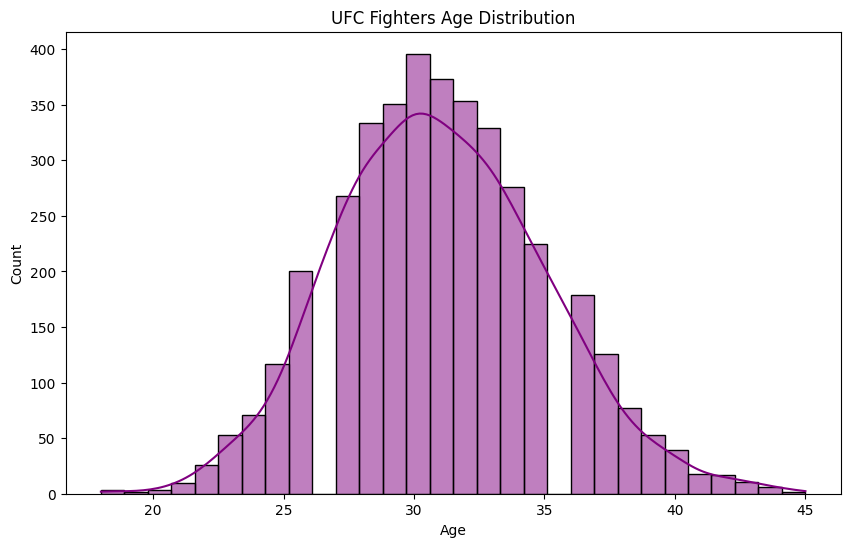

In [885]:
# Combine red fighter's age and blue fighter's age into a single series for plotting
all_ages = pd.concat([analysis_df['RedAge'], analysis_df['BlueAge']], ignore_index=True)

# Plot the age distribution
plt.figure(figsize=(10,6))
sns.histplot(all_ages, bins=30, kde=True, color='purple')
plt.title('UFC Fighters Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

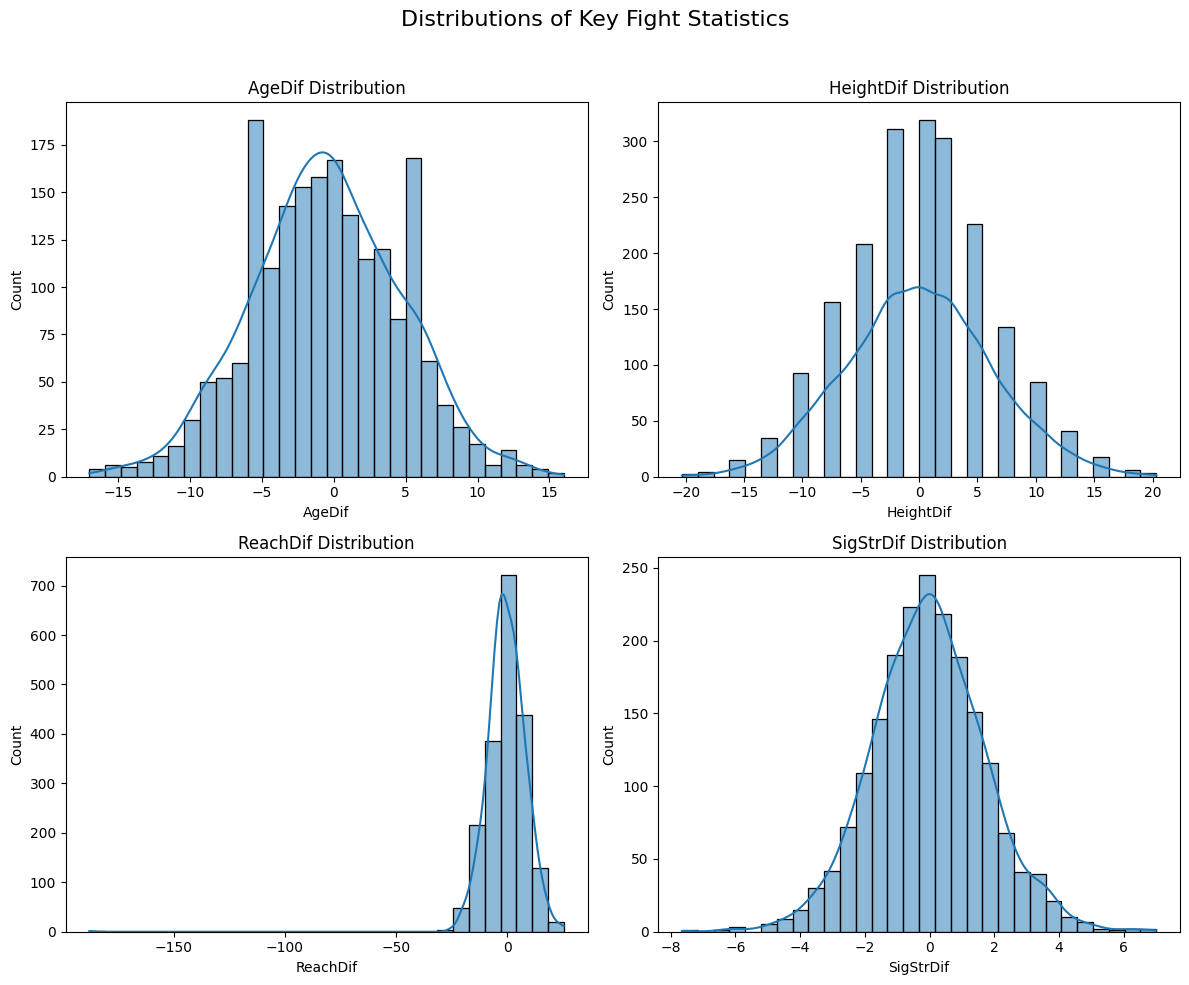

In [886]:
key_columns = ['AgeDif', 'HeightDif', 'ReachDif', 'SigStrDif'] 
fig, axes = plt.subplots(2, 2, figsize=(12, 10)) 
fig.suptitle('Distributions of Key Fight Statistics', fontsize=16)

for ax, col in zip(axes.flatten(), key_columns):
    sns.histplot(analysis_df[col].dropna(), bins=30, kde=True, ax=ax)
    ax.set_title(f'{col} Distribution')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

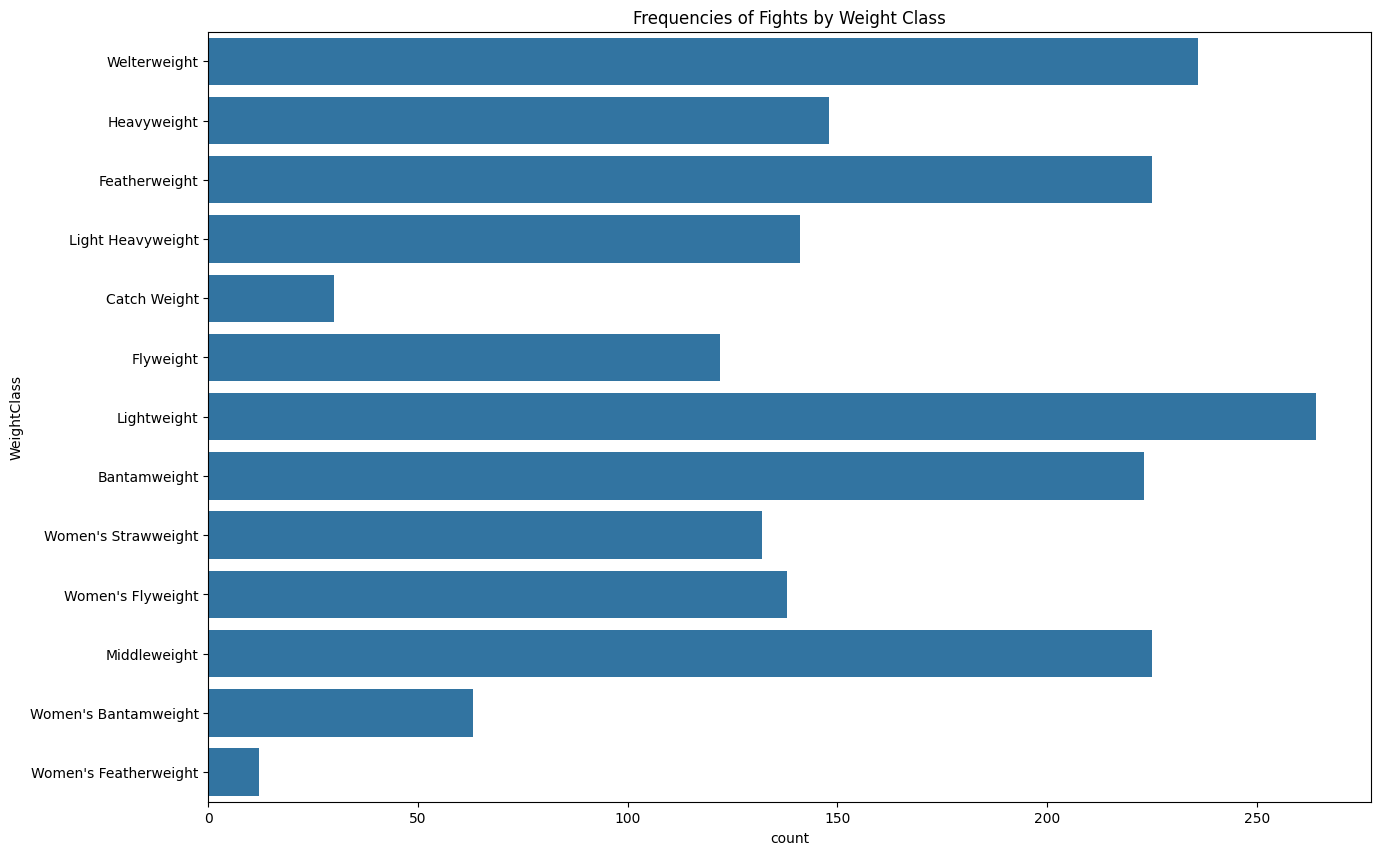

In [887]:
plt.figure(figsize=(15,10))
sns.countplot(y='WeightClass', data=analysis_df)
plt.title("Frequencies of Fights by Weight Class")
plt.show()

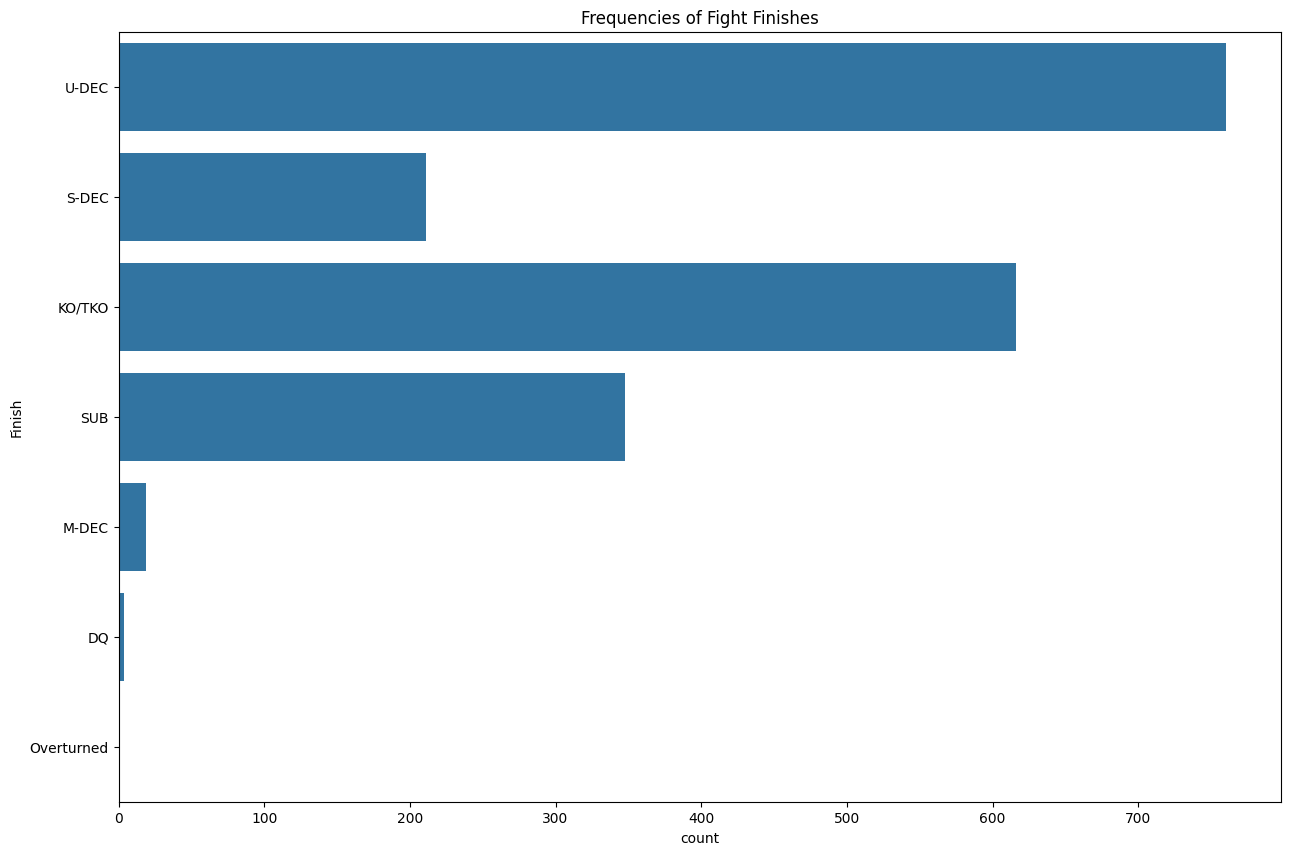

In [888]:
plt.figure(figsize=(15,10))
sns.countplot(y='Finish', data=analysis_df)
plt.title("Frequencies of Fight Finishes")
plt.show()

In [889]:
analysis_df   

,RedFighter,BlueFighter,Winner,TitleBout,WeightClass,Gender,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,...,HeightDif,ReachDif,AgeDif,SigStrDif,AvgSubAttDif,AvgTDDif,Finish,FinishRound,FinishRoundTime,TotalFightTimeSecs
1,Shavkat Rakhmonov,Ian Machado Garry,Red,False,Welterweight,MALE,3,0,8,0,...,5.08,-7.62,-3,1.3800,-1.5000,-0.7200,U-DEC,5.0,5:00,1500.0
2,Ciryl Gane,Alexander Volkov,Red,False,Heavyweight,MALE,3,0,4,0,...,7.62,-2.54,2,-0.3600,-0.3000,-0.1300,S-DEC,3.0,5:00,900.0
3,Bryce Mitchell,Kron Gracie,Red,False,Featherweight,MALE,3,2,0,0,...,-2.54,0.00,6,1.4400,-1.1000,-2.9800,KO/TKO,3.0,0:39,639.0
4,Nate Landwehr,Dooho Choi,Blue,False,Featherweight,MALE,3,0,1,1,...,2.54,-5.08,-3,-1.8400,-0.2000,-0.2500,KO/TKO,3.0,3:21,801.0
5,Dominick Reyes,Anthony Smith,Red,False,Light Heavyweight,MALE,3,1,0,0,...,0.00,-2.54,2,-1.6300,0.3000,0.1100,KO/TKO,2.0,4:46,586.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5302,Vinc Pichel,Garett Whiteley,Red,False,Lightweight,MALE,3,1,0,0,...,5.08,0.00,-2,7.0000,0.0000,0.0000,U-DEC,3.0,5:00,900.0
6285,Mark Hunt,Chris Tuchscherer,Red,False,Heavyweight,MALE,3,1,0,0,...,10.16,10.16,1,6.3333,0.3333,-0.6667,KO/TKO,2.0,1:41,401.0
6388,Steve Lopez,Waylon Lowe,Blue,False,Lightweight,MALE,3,1,0,0,...,-10.16,-15.34,-3,-5.0000,0.0000,1.0000,S-DEC,3.0,5:00,900.0
6456,Ben Rothwell,Gilbert Yvel,Red,False,Heavyweight,MALE,3,1,0,0,...,-5.08,-2.54,-5,0.0000,0.0000,0.0000,U-DEC,3.0,5:00,900.0


In [890]:
analysis_df['RedSigStrAttPerMin'] = analysis_df['RedAvgSigStrLanded'] / analysis_df['RedAvgSigStrPct']
analysis_df['BlueSigStrAttPerMin'] = analysis_df['BlueAvgSigStrLanded'] / analysis_df['BlueAvgSigStrPct']

red_df = analysis_df[['RedFighter', 'RedSigStrAttPerMin', 'RedAvgSigStrPct', 'RedAvgTDLanded', 'RedAvgSigStrLanded']]
blue_df = analysis_df[['BlueFighter', 'BlueSigStrAttPerMin', 'BlueAvgSigStrPct', 'BlueAvgTDLanded', 'BlueAvgSigStrLanded' ]]
red_df.columns = ['Fighter', 'SigStrAttPerMin', 'SigStrPct', 'TDLanded', 'AvgSigStrLanded']
blue_df.columns = ['Fighter', 'SigStrAttPerMin', 'SigStrPct', 'TDLanded', 'AvgSigStrLanded']
fighters_df = pd.concat([red_df, blue_df], ignore_index=True)
fighters_df = fighters_df[fighters_df['TDLanded'] > 0]
fighters_df['TD Landed Per Min'] = fighters_df['TDLanded'] / 15



In [891]:
fighters_df

,Fighter,SigStrAttPerMin,SigStrPct,TDLanded,AvgSigStrLanded,TD Landed Per Min
0,Shavkat Rakhmonov,6.754098,0.61,1.4900,4.1200,0.099333
1,Ciryl Gane,9.150000,0.60,0.5800,5.4900,0.038667
2,Bryce Mitchell,3.965517,0.58,3.4500,2.3000,0.230000
3,Nate Landwehr,13.586957,0.46,1.0000,6.2500,0.066667
4,Dominick Reyes,9.740000,0.50,0.3500,4.8700,0.023333
...,...,...,...,...,...,...
3905,Luis Pena,8.222222,0.45,1.2500,3.7000,0.083333
3907,Molly McCann,13.244898,0.49,2.5900,6.4900,0.172667
3908,Rachael Ostovich,13.043478,0.23,1.0000,3.0000,0.066667
3914,Chris Tuchscherer,43.859474,0.19,0.3333,8.3333,0.022220


In [892]:
mean = fighters_df['SigStrAttPerMin'].mean()
std = fighters_df['SigStrAttPerMin'].std()
anomalies = fighters_df['SigStrAttPerMin'][np.abs((fighters_df['SigStrAttPerMin'] - mean) / std) > 2]

In [893]:
fighters_df[fighters_df['SigStrAttPerMin'].isin(anomalies)]

,Fighter,SigStrAttPerMin,SigStrPct,TDLanded,AvgSigStrLanded,TD Landed Per Min
83,Daniel Rodriguez,15.306122,0.49,0.5900,7.5000,0.039333
116,Daniel Zellhuber,15.650000,0.40,0.1800,6.2600,0.012000
150,Casey O'Neill,15.173077,0.52,1.4500,7.8900,0.096667
158,Toshiomi Kazama,3.245283,0.53,1.6800,1.7200,0.112000
203,Joshua Van,15.830189,0.53,1.6200,8.3900,0.108000
...,...,...,...,...,...,...
3818,Diego Ferreira,14.083333,0.36,1.0400,5.0700,0.069333
3831,Cory Sandhagen,14.875000,0.48,1.2400,7.1400,0.082667
3869,Irene Aldana,16.210526,0.38,0.2800,6.1600,0.018667
3872,Jin Soo Son,14.166667,0.36,1.5000,5.1000,0.100000


In [894]:
fighters_df = fighters_df[~fighters_df['SigStrAttPerMin'].isin(anomalies)] 

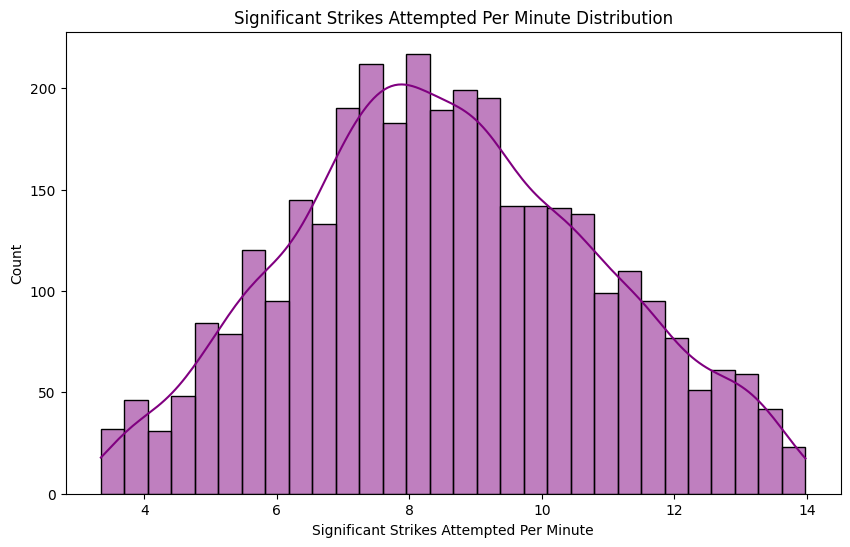

In [895]:
plt.figure(figsize=(10,6))
sns.histplot(fighters_df['SigStrAttPerMin'], bins=30, kde=True, color='purple')
plt.title('Significant Strikes Attempted Per Minute Distribution')
plt.xlabel('Significant Strikes Attempted Per Minute')
plt.ylabel('Count')
plt.show()

/var/folders/76/98xj4m9j2133gv8vv63lkhhh0000gn/T/ipykernel_87400/1633377734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fighters_df['AttBin'] = pd.cut(fighters_df['SigStrAttPerMin'], bins=[2, 4, 6, 8, 10, 12, 14])


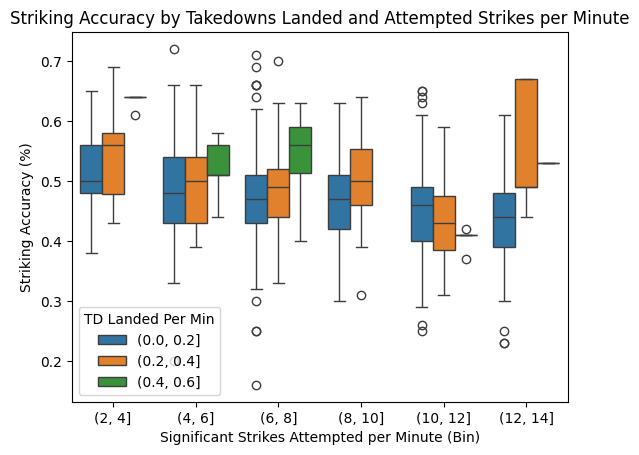

<Figure size 2000x3000 with 0 Axes>

In [896]:

# Bin by SigStrAttPerMin
fighters_df['AttBin'] = pd.cut(fighters_df['SigStrAttPerMin'], bins=[2, 4, 6, 8, 10, 12, 14])

# Compare striking accuracy by takedown groups within bins
sns.boxplot(x='AttBin', y='SigStrPct', hue=pd.cut(fighters_df['TD Landed Per Min'], bins=[0, 0.2, 0.4, 0.6]), data=fighters_df)
plt.title('Striking Accuracy by Takedowns Landed and Attempted Strikes per Minute')
plt.xlabel('Significant Strikes Attempted per Minute (Bin)')
plt.ylabel('Striking Accuracy (%)')
plt.figure(figsize=(20,30))
plt.show()


In [897]:
print(fighters_df['SigStrAttPerMin'].mean())

8.553541372490427


In [898]:
fighters_df[fighters_df['SigStrAttPerMin'].between(6, 8)]

,Fighter,SigStrAttPerMin,SigStrPct,TDLanded,AvgSigStrLanded,TD Landed Per Min,AttBin
0,Shavkat Rakhmonov,6.754098,0.61,1.49,4.12,0.099333,"(6, 8]"
8,Chris Weidman,7.066667,0.45,3.44,3.18,0.229333,"(6, 8]"
9,Cody Durden,6.700000,0.50,4.36,3.35,0.290667,"(6, 8]"
11,Clay Guida,8.000000,0.33,3.13,2.64,0.208667,"(6, 8]"
20,Kiru Sahota,7.788462,0.52,0.92,4.05,0.061333,"(6, 8]"
...,...,...,...,...,...,...,...
3897,Junior Albini,7.803922,0.51,1.54,3.98,0.102667,"(6, 8]"
3899,Randy Brown,7.255319,0.47,0.95,3.41,0.063333,"(6, 8]"
3901,Montana De La Rosa,6.969697,0.33,2.22,2.30,0.148000,"(6, 8]"
3902,Alessio Di Chirico,7.619048,0.42,1.95,3.20,0.130000,"(6, 8]"
